In [61]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

from astropy.table import Table
import astropy.units as u

In [62]:
plt.style.use('notebook')

In [63]:
t = Table.read('../data/kepler_giants.fits')

In [64]:
t

_RAJ2000,_DEJ2000,KIC,Kpmag,QLen,DLen,numax,e_numax,Delnu,e_Delnu,A,e_A,Width,e_Width,Gran,e_Gran,Teff,e_Teff,log_g_,e_log_g_,__Fe_H_,e__Fe_H_,NoCorM,e_NoCorM,NoCorR,e_NoCorR,RGBcorM,e_RGBcorM,RGBcorR,e_RGBcorR,ClcorM,e_ClcorM,ClcorR,e_ClcorR,Phase,M17,Simbad,_RA,_DE
deg,deg,,mag,,d,uHz,uHz,uHz,uHz,ppm,ppm,uHz,uHz,ppm2/uHz,ppm2/uHz,K,K,[cm/s2],[cm/s2],[Sun],[Sun],Msun,Msun,Rsun,Rsun,Msun,Msun,Rsun,Rsun,Msun,Msun,Rsun,Rsun,,,,deg,deg
float64,float64,int32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,bytes3,bytes6,float64,float64
291.055880000,36.559951944,757137,9.200,17,1308.70,29.99,0.60,3.399,0.011,104.9,4.6,12.3,1.5,2787.2,286.3,4751,139,2.383,0.012,-0.08,0.30,1.70,0.14,13.91,0.41,1.55,0.13,13.26,0.39,1.72,0.14,13.97,0.41,1,M17,Simbad,291.0558800,36.5599519
290.981080000,36.666981111,892010,11.670,4,206.30,17.85,0.89,2.427,0.078,196.0,20.5,8.5,2.5,17002.1,3464.7,4834,151,2.161,0.023,0.21,0.30,1.42,0.29,16.37,1.38,1.36,0.28,16.02,1.34,1.43,0.30,16.47,1.39,0,M17,Simbad,290.9810800,36.6669811
291.145290000,36.694080000,892738,11.730,18,1318.10,7.48,0.35,1.300,0.031,384.4,35.5,3.4,0.7,141955.4,12636.8,4534,135,1.769,0.022,-0.25,0.30,1.15,0.21,23.15,1.62,0.99,0.18,21.49,1.48,1.12,0.20,22.86,1.60,0,M17,Simbad,291.1452900,36.6940800
291.151030000,36.684940000,892760,13.230,6,380.80,29.48,0.48,3.962,0.116,149.7,8.3,12.0,3.9,6319.1,1108.3,5188,183,2.394,0.011,-0.21,0.30,1.00,0.14,10.51,0.68,1.04,0.15,10.74,0.70,1.00,0.14,10.52,0.68,2,M17,Simbad,291.1510300,36.6849400
291.248630000,36.638420000,893214,12.580,15,1211.90,41.39,0.54,4.311,0.013,86.1,4.6,15.3,1.6,1337.0,289.9,4728,80,2.522,0.008,-0.15,0.15,1.72,0.10,11.90,0.26,1.54,0.09,11.29,0.24,1.72,0.10,11.92,0.26,1,M17,Simbad,291.2486300,36.6384200
291.252380000,36.601688056,893233,11.440,8,638.90,6.15,0.12,1.176,0.018,563.5,50.6,2.3,0.3,174726.9,18712.7,4207,147,1.668,0.012,0.22,0.30,0.86,0.09,22.43,0.95,0.71,0.07,20.46,0.84,0.84,0.09,22.28,0.94,0,M17,Simbad,291.2523800,36.6016881
291.056180000,36.704041111,1026084,12.140,15,1139.00,41.17,0.90,4.414,0.061,63.8,2.9,24.8,2.7,733.1,165.0,5072,166,2.534,0.013,-0.12,0.30,1.71,0.18,11.69,0.48,1.67,0.17,11.55,0.48,1.75,0.18,11.83,0.49,2,M17,Simbad,291.0561800,36.7040411
291.080170000,36.760501944,1026180,11.740,4,206.30,36.91,0.71,3.991,0.064,116.1,9.6,14.0,2.4,1641.2,697.8,4718,148,2.471,0.012,-0.02,0.30,1.65,0.17,12.37,0.53,1.50,0.16,11.80,0.50,1.67,0.17,12.43,0.53,2,M17,Simbad,291.0801700,36.7605019


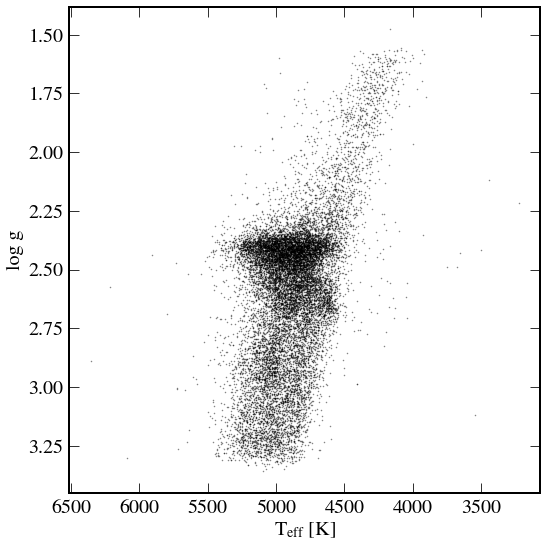

In [65]:
plt.plot(t['Teff'], t['log_g_'], 'k.', ms=1, alpha=0.5)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.xlabel('T$_{eff}$ [K]')
plt.ylabel('log g')

plt.tight_layout()

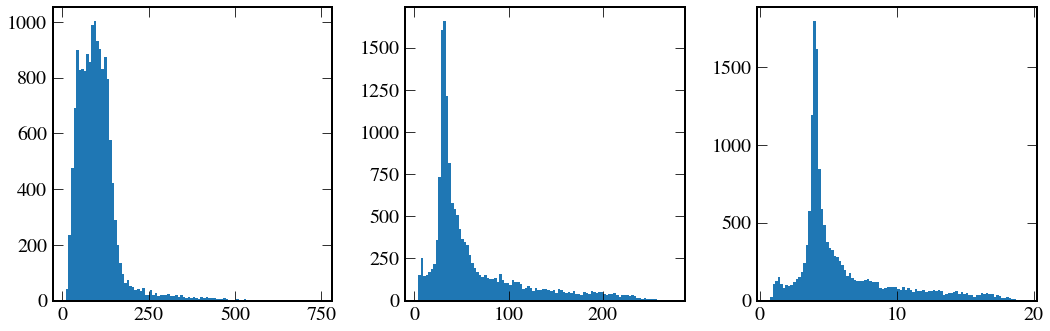

In [66]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
plt.sca(ax[0])
plt.hist(t['A'], bins=100)

plt.sca(ax[1])
plt.hist(t['numax'], bins=100)

plt.sca(ax[2])
plt.hist(t['Delnu'], bins=100)

plt.tight_layout()

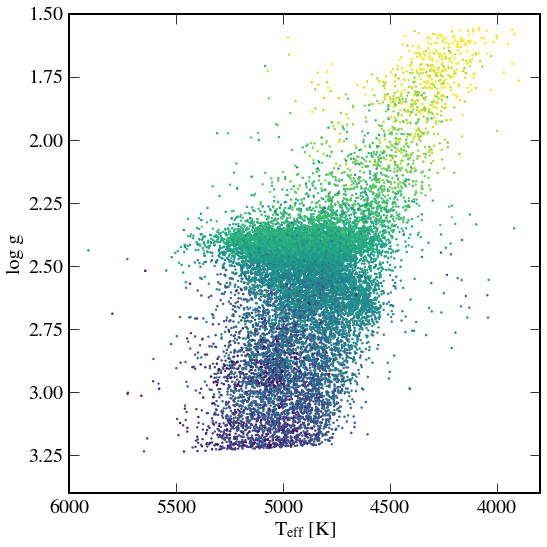

In [67]:
# plt.scatter(t['Teff'], t['log_g_'], c=t['A'], s=1, vmin=10, vmax=200, cmap='viridis')
plt.scatter(t['Teff'], t['log_g_'], c=t['A'], s=2, vmin=20, vmax=400, cmap='viridis', norm=mpl.colors.LogNorm())
# plt.scatter(t['Teff'], t['log_g_'], c=np.log10(t['A']), s=1, vmin=1.1, vmax=2.6, cmap='viridis')

plt.xlim(6000,3800)
plt.ylim(3.4,1.5)

plt.xlabel('T$_{eff}$ [K]')
plt.ylabel('log g')

plt.tight_layout()

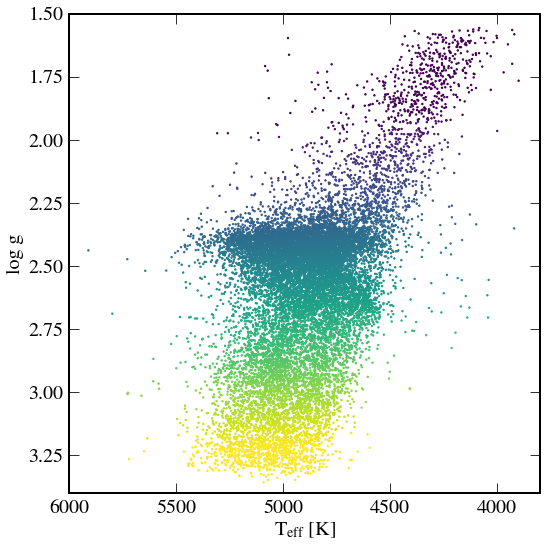

In [68]:
plt.scatter(t['Teff'], t['log_g_'], c=t['numax'], s=2, cmap='viridis', vmin=10, vmax=200, norm=mpl.colors.LogNorm())

plt.xlim(6000,3800)
plt.ylim(3.4,1.5)

plt.xlabel('T$_{eff}$ [K]')
plt.ylabel('log g')

plt.tight_layout()

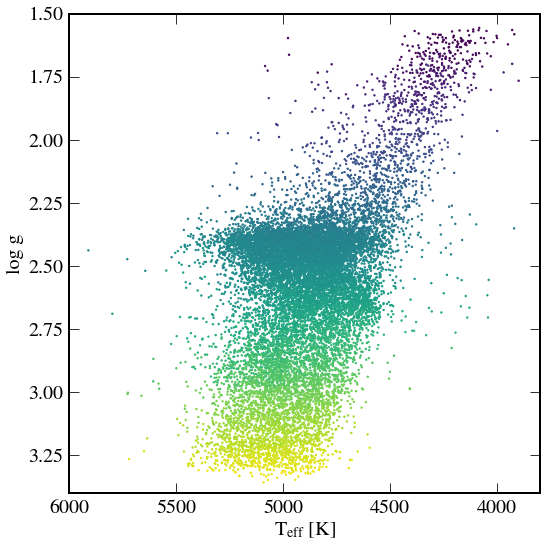

In [69]:
plt.scatter(t['Teff'], t['log_g_'], c=t['Delnu'], s=2, cmap='viridis', vmin=1, vmax=20, norm=mpl.colors.LogNorm())

plt.xlim(6000,3800)
plt.ylim(3.4,1.5)

plt.xlabel('T$_{eff}$ [K]')
plt.ylabel('log g')

plt.tight_layout()

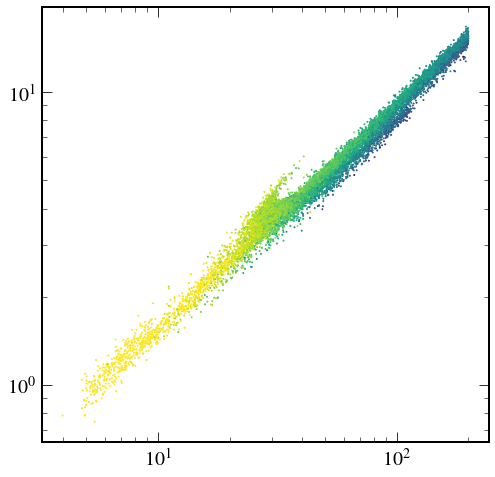

In [70]:
# plt.plot(t['numax'], t['Delnu'], 'k.', ms=1, alpha=0.5)
plt.scatter(t['numax'], t['Delnu'], c=t['A'], s=1, vmin=10, vmax=200, norm=mpl.colors.LogNorm())
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

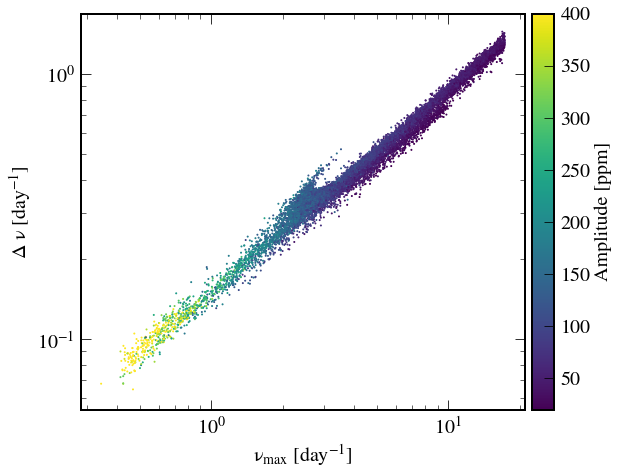

In [82]:
plt.figure(figsize=(9,7))

im = plt.scatter(t['numax'].to(u.day**-1), t['Delnu'].to(u.day**-1), c=t['A'],
                 s=1, vmin=20, vmax=400, cmap='viridis')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('$\\nu_{max}$ [day$^{-1}$]')
plt.ylabel('$\Delta$ $\\nu$ [day$^{-1}$]')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes('right', size='5%', pad=0.1)
cb = plt.colorbar(im, cax=cax) #, ticks=[20,50,100,200])
plt.ylabel('Amplitude [ppm]')
# cb.set_ticks([20,50,100,200])

plt.tight_layout()
plt.savefig('../plots/dnu_numax.png')

In [ ]:
plt.figure(figsize=(9,7))

im = plt.scatter(t['numax'].to(u.day**-1), t['Delnu'].to(u.day**-1), c=t['A'],
                 s=1, vmin=20, vmax=400, cmap='viridis', norm=mpl.colors)

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('$\\nu_{max}$ [day$^{-1}$]')
plt.ylabel('$\Delta$ $\\nu$ [day$^{-1}$]')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes('right', size='5%', pad=0.1)
cb = plt.colorbar(im, cax=cax) #, ticks=[20,50,100,200])
plt.ylabel('Amplitude [ppm]')
# cb.set_ticks([20,50,100,200])

plt.tight_layout()
plt.savefig('../plots/dnu_numax_log.png')